In [ ]:
import pandas as pd
from sklearn import *
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split # Treino e teste do modelo
from sklearn.preprocessing import StandardScaler, MinMaxScaler # classificação
from sklearn.neighbors import KNeighborsClassifier # classificação por vizinhos
from sklearn.metrics import accuracy_score # acuracia do modelo

In [ ]:
df = pd.read_csv("https://github.com/wesleyesantos/Techchallenge2/raw/main/Dados%20Hist%C3%B3ricos%20-%20Ibovespa.csv", sep=",")

In [ ]:
df

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,16.02.2024,128.726,127.809,129.069,127.653,"10,12M","0,72%"
1,15.02.2024,127.804,127.018,127.824,126.932,"10,98M","0,62%"
2,14.02.2024,127.018,128.026,128.026,126.663,"7,75M","-0,79%"
3,09.02.2024,128.026,128.216,128.896,127.579,"12,12M","-0,15%"
4,08.02.2024,128.217,129.950,130.126,127.912,"13,63M","-1,33%"
...,...,...,...,...,...,...,...
1269,08.01.2019,92.032,91.699,92.231,91.064,"4,64M","0,36%"
1270,07.01.2019,91.699,91.845,92.552,91.288,"4,71M","-0,15%"
1271,04.01.2019,91.841,91.577,92.701,90.824,"5,49M","0,30%"
1272,03.01.2019,91.564,91.011,91.596,89.922,"6,25M","0,61%"


In [ ]:
df.shape

(1274, 7)

In [ ]:
df.isnull().sum()

Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        0
Var%        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      1274 non-null   object 
 1   Último    1274 non-null   float64
 2   Abertura  1274 non-null   float64
 3   Máxima    1274 non-null   float64
 4   Mínima    1274 non-null   float64
 5   Vol.      1274 non-null   object 
 6   Var%      1274 non-null   object 
dtypes: float64(4), object(3)
memory usage: 69.8+ KB


In [ ]:
df['Data'] = pd.to_datetime(df['Data'])

<ipython-input-174-c213339dfd28>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Data'] = pd.to_datetime(df['Data'])


In [ ]:
df['tipo'] = df['Vol.'].str[-1]

In [ ]:
df['Vol.'] = df['Vol.'].str.replace(',', '.')
df['Vol.'] = df['Vol.'].str.replace('M', '')
df['Vol.'] = df['Vol.'].str.replace('K', '').astype('float64')

In [ ]:
df['Var%'] = df['Var%'].str.replace('%', '')
df['Var%'] = df['Var%'].str.replace(',', '.').astype('float64')

In [ ]:
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,tipo
0,2024-02-16,128.726,127.809,129.069,127.653,10.12,0.72,M
1,2024-02-15,127.804,127.018,127.824,126.932,10.98,0.62,M
2,2024-02-14,127.018,128.026,128.026,126.663,7.75,-0.79,M
3,2024-09-02,128.026,128.216,128.896,127.579,12.12,-0.15,M
4,2024-08-02,128.217,129.950,130.126,127.912,13.63,-1.33,M


In [ ]:
df['tipo'].unique()

array(['M', 'K'], dtype=object)

In [ ]:
df['tipo'] = df['tipo'].str.replace('M', '1000000')
df['tipo'] = df['tipo'].str.replace('K', '1000').astype('float64')

In [ ]:
df['Vol.'] = df['Vol.']*df['tipo']
df.drop('tipo', axis = 1)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2024-02-16,128.726,127.809,129.069,127.653,10120000.0,0.72
1,2024-02-15,127.804,127.018,127.824,126.932,10980000.0,0.62
2,2024-02-14,127.018,128.026,128.026,126.663,7750000.0,-0.79
3,2024-09-02,128.026,128.216,128.896,127.579,12120000.0,-0.15
4,2024-08-02,128.217,129.950,130.126,127.912,13630000.0,-1.33
...,...,...,...,...,...,...,...
1269,2019-08-01,92.032,91.699,92.231,91.064,4640000.0,0.36
1270,2019-07-01,91.699,91.845,92.552,91.288,4710000.0,-0.15
1271,2019-04-01,91.841,91.577,92.701,90.824,5490000.0,0.30
1272,2019-03-01,91.564,91.011,91.596,89.922,6250000.0,0.61


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      1274 non-null   datetime64[ns]
 1   Último    1274 non-null   float64       
 2   Abertura  1274 non-null   float64       
 3   Máxima    1274 non-null   float64       
 4   Mínima    1274 non-null   float64       
 5   Vol.      1274 non-null   float64       
 6   Var%      1274 non-null   float64       
 7   tipo      1274 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 79.8 KB


In [ ]:
df['Ano'] = df['Data'].dt.year

<ipython-input-184-8478ad43bd1d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matriz = df.corr().round(2)


<Axes: >

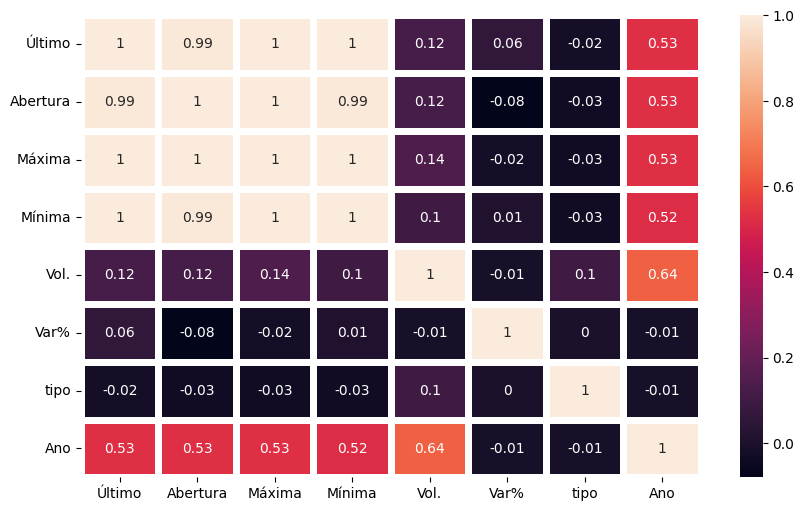

In [ ]:
# A matriz de correlação mostra que tem grande relação os valores de último, abertura, minimo e maximo
correlation_matriz = df.corr().round(2)

fig, ax = plt.subplots(figsize=(10,6))
sb.heatmap(data=correlation_matriz, annot=True, linewidths=5, ax=ax)

In [ ]:
# Definir melhores correlações e separar dados com melhores correlações
 # - a partir da matriz de correlação
x = df[['Abertura', 'Último']]
y = df['Ano']

In [ ]:
# Criar modelo de teste e treino
 # from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y, random_state = 7)

In [ ]:
x_train.shape

(1019, 2)

In [ ]:
x_test.shape

(255, 2)

In [ ]:
x.shape

(1274, 2)

In [ ]:
# Ajustar as escalas dos dados
 # from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler() # MinMaxScaler dá pra fazer também mas muda o método
scaler.fit(x_train)

x_train_escalonado = scaler.transform(x_train)

x_test_escalonado = scaler.transform(x_test)

In [ ]:
# Definir lista de erros médios

error = []

for i in range(1,10):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(x_train_escalonado, y_train)
  pred_i = knn.predict(x_test_escalonado)
  error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Erro Médio')

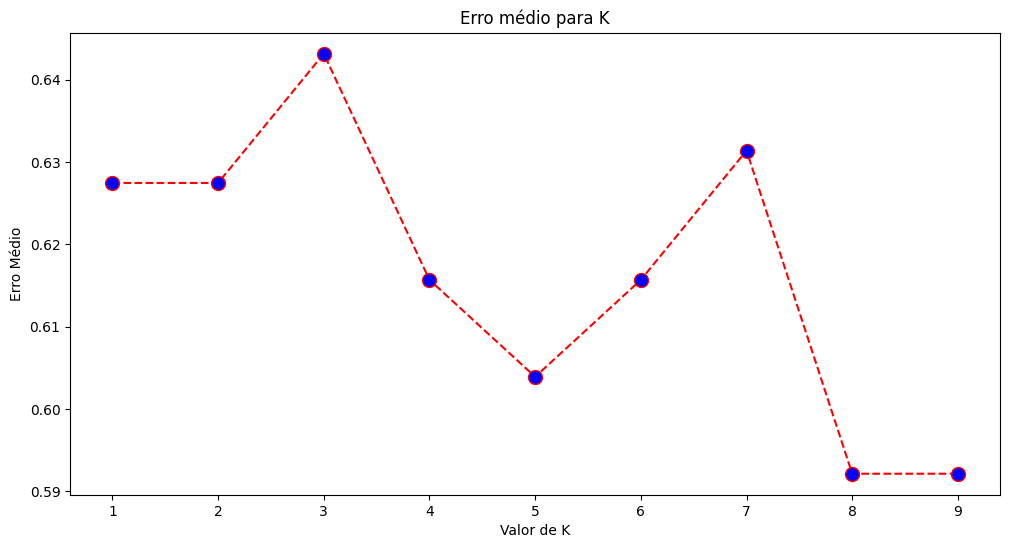

In [ ]:
plt.figure(figsize = (12,6))

plt.plot(range(1,10), error, color = 'red', linestyle = 'dashed', marker ='o', markerfacecolor = 'blue', markersize = 10)

plt.title('Erro médio para K')
plt.xlabel('Valor de K')
plt.ylabel('Erro Médio')

In [ ]:
modelo_classificador= KNeighborsClassifier(n_neighbors = 5) # escolhido com base na análise do erro
modelo_classificador.fit(x_train_escalonado, y_train)

y_predito = modelo_classificador.predict(x_test_escalonado)

In [ ]:
print(accuracy_score(y_test, y_predito))

0.396078431372549


### Acuracia com SVM

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [ ]:
svm = Pipeline(
    [
        ('linear_svc', LinearSVC(C=1)) # C é a margem de separação dos dados, quanto maior tem que testar pra verificar se está adequada, pois varia de algoritmo para algoritmo
    ]
)

In [ ]:
svm.fit(x_train_escalonado, y_train)

Pipeline(steps=[('linear_svc', LinearSVC(C=1))])

In [ ]:
y_predito_svm = svm.predict(x_test_escalonado)

In [ ]:
print(accuracy_score(y_test, y_predito_svm)) # Resultado ficou pior com SVM

0.2823529411764706
